In [1]:
import numpy as np
import pylab as pl
from network_correlations import *
% matplotlib inline
T = 50. #[s] recording time of all the spiketrains
rate = 150

/home/ai-shwarya/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
'''
1)  Use the function poisson_generator to  create three independent spiketrains. From 
these three create two correlated spiketrains, mimicking common input. (Use np.append or np.hstack 
to join two spiketrains together!)
Measure the correlation coefficient of y1 and y2 for different rates of the generating 
processes. How do you have to choose the rates of x1, x2 and xcommon  to get two processes 
y1 and y2 of a given rate and correlation coefficient rho?
'''


def input_generator(rate,rho,T):
    x1 = poisson_generator(rate*(1-rho),T) #T is overall length of the spike train
    x2 = poisson_generator(rate*(1-rho),T)
    xcommon = poisson_generator(rate*rho,T)
    return np.append(x1,xcommon), np.append(x2,xcommon)


new_input = input_generator(500.,0.2,10*T)
corr_coeff(new_input[0], new_input[1],200.,10*T)

/home/ai-shwarya/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


0.17548233917362202

(0, 0.5)

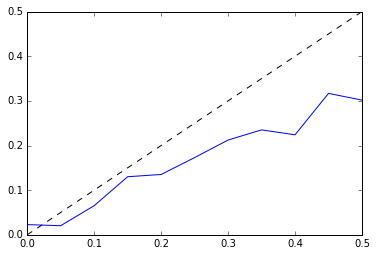

In [3]:
'''
2)  The function simple_neuron computes the output firing spiketrain of a model neuron 
given an input spiketrain. Investigate the correlation coefficient of the output spiketrains, 
when you use y1 and y2 as inputs. Plot the correlation coefficient of the output spiketrains 
rho_out for different correlation coefficients rho_in  between y1 and y2 (keeping the mean 
input rate constant).
'''

rate=120.
rho_in = np.arange(0.,.55,0.05)
rho_out = np.zeros(len(rho_in))
for i,rho in enumerate(rho_in):
    inp = input_generator(rate,rho,T)
    outp =(simple_neuron(inp[0],T),simple_neuron(inp[1],T))
    rho_out[i]=corr_coeff(outp[0],outp[1],50.,T)

pl.figure()
pl.plot(rho_in,rho_out)
pl.plot(rho_in,rho_in,'k--')
pl.ylim([0,.5])

#The output correlation is less than input correlation. 

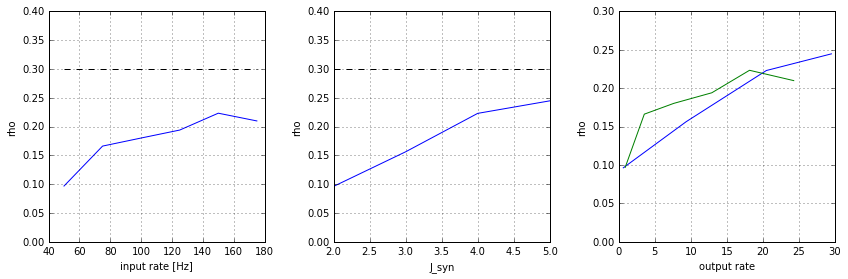

In [4]:
'''
3) How does this output correlation rho_out change for different input 
rates and synaptic weights Jsyn?
'''
T=200.

rates = np.arange(50.,200.,25.)
rho_in = 0.3
rho_out_rates = np.zeros(len(rates))
out_rates = np.zeros(len(rates))
for j,rate in enumerate(rates): #for number, element in enumerate(particular vector containing elements)
        inp = input_generator(rate,rho_in,T)
        outp =(simple_neuron(inp[0],T),simple_neuron(inp[1],T))
        rho_out_rates[j]=corr_coeff(outp[0],outp[1],50.,T)
        out_rates[j] = (len(outp[0])+len(outp[1]))/(2*T)

T=50.
rate = 200.
jsyns = np.arange(2.,6.,1.)
rho_in = 0.3
rho_out_j = np.zeros(len(jsyns))
out_j = np.zeros(len(jsyns))
for j,jsyn in enumerate(jsyns):
        inp = input_generator(rate,rho_in,T)
        outp =(simple_neuron(inp[0],T,Jsyn=jsyn),simple_neuron(inp[1],T,Jsyn=jsyn))
        rho_out_j[j]=corr_coeff(outp[0],outp[1],50.,T)
        out_j[j] = (len(outp[0])+len(outp[1]))/(2*T)
        
fig = pl.figure(figsize = [12,4])
ax1 = fig.add_axes([.0,.0,.25,.8])

ax1.plot(rates,rho_out_rates)
ax1.plot(rates,rho_in*np.ones(np.size(rates)), 'k--')
ax1.set_xlabel('input rate [Hz]')
ax1.set_ylabel('rho')
ax1.set_ylim([0.,0.4])
ax1.grid()
        
ax2 = fig.add_axes([.33,.0,.25,.8])  
ax2.plot(jsyns,rho_out_j)
ax2.plot(jsyns,rho_in*np.ones(np.size(jsyns)), 'k--')
ax2.set_xlabel('J_syn')
ax2.set_ylabel('rho')
ax2.set_ylim([0.,0.4])
ax2.grid()

ax3 = fig.add_axes([.66,.0,.25,.8])  
ax3.plot(out_j, rho_out_j)
ax3.plot(out_rates, rho_out_rates)
ax3.set_xlabel('output rate')
ax3.set_ylabel('rho')
ax3.set_ylim([0.,0.3])
ax3.grid()

#Better correlations happen with better firing rates(Origin and transfer de la Rocha, Doiron et al, 2007; Shea Brown et al, 2008)